Prediction Accuracy: 90.0%



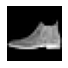

Predicted: Ankle boot



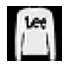

Predicted: Pullover



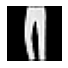

Predicted: Trouser



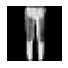

Predicted: Trouser



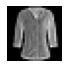

Predicted: Shirt



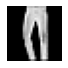

Predicted: Trouser



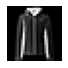

Predicted: Coat



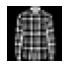

Predicted: Shirt



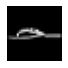

Predicted: Sandal



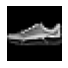

Predicted: Sneaker



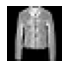

Predicted: Coat



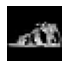

Predicted: Sandal



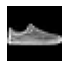

Predicted: Sandal



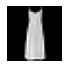

Predicted: Dress



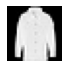

Predicted: Coat



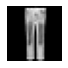

Predicted: Trouser



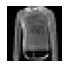

Predicted: Pullover



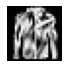

Predicted: Pullover



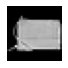

Predicted: Bag



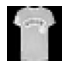

Predicted: T-shirt/top



In [4]:
from PIL import Image
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def write_image(image, path):
  img = Image.fromarray(np.array(image), 'L')
  img.save(path)

#Reading the files

TestDataFile = 't10k-images-idx3-ubyte'
TestLabelFile = 't10k-labels-idx1-ubyte'
TrainDataFile = 'train-images-idx3-ubyte'
TrainLabelFile = 'train-labels-idx1-ubyte'

def byte_to_int(byte_data):
  return int.from_bytes(byte_data, 'big')

def read_images(file, n_max_img=None):
  images = []
  with open(file, 'rb') as f:
    _ = f.read(4) #magic number
    n_images = byte_to_int(f.read(4)) #4 bytes as the data type is 32 but interger
    if n_max_img:
      n_images = n_max_img
    n_rows = byte_to_int(f.read(4))
    n_columns = byte_to_int(f.read(4))
    for img_idx in range(n_images):
      image = []
      for row_idx in range(n_rows):
        row = []
        for col_idx in range(n_columns):
          pixel = f.read(1)
          row.append(pixel)
        image.append(row)
      images.append(image)
  return images

def read_labels(file, n_max_lab=None):
  labels = []
  with open(file, 'rb') as f:
    _ = f.read(4) #magic number
    n_labels = byte_to_int(f.read(4)) 
    if n_max_lab:
      n_labels = n_max_lab
    for label_idx in range(n_labels):
      label = f.read(1)
      labels.append(label)
  return labels

#Making 2-D list to 1-D

def flatten_list(l):
  return [pixel for sublist in l for pixel in sublist]

def extract_features(X):
  return [flatten_list(sample) for sample in X]

#Implementing K-nearest neighbours

def dist(x,y): #euclidean distance
  return sum((byte_to_int(x_i) - byte_to_int(y_i))**2 for x_i, y_i in zip(x,y))**(0.5)

def get_training_distance(X_train,test_sample):
  return [dist(train_sample, test_sample) for train_sample in X_train]

def get_freq_element(l):
  return max(l, key=l.count)

def knn(X_train, y_train, X_test, k=3):
  y_pred = []
  for test_sample in X_test:
    training_distances = get_training_distance(X_train, test_sample)
    sorted_distance_indices = [ 
            pair[0]
            for pair in sorted(enumerate(training_distances), key=lambda x: x[1])
    ]
    guesses = [
        byte_to_int(y_train[idx])
        for idx in sorted_distance_indices[:k]
    ]
    top_guess = get_freq_element(guesses)
    y_pred.append(top_guess)
  return y_pred

def get_garment(label):
    return [
        'T-shirt/top',
        'Trouser',
        'Pullover',
        'Dress',
        'Coat',
        'Sandal',
        'Shirt',
        'Sneaker',
        'Bag',
        'Ankle boot',
    ][label]

X_train = read_images(TrainDataFile, 3000)
y_train = read_labels(TrainLabelFile, 3000)
X_test = read_images(TestDataFile, 20)
y_test = read_labels(TestLabelFile, 20)

for idx, test_sample in enumerate(X_test):
  write_image(test_sample, f'{idx}.png')

X_train = extract_features(X_train)
X_test = extract_features(X_test)

y_pred = knn(X_train, y_train, X_test, 5)

garments_pred = [
       get_garment(label)
       for label in y_pred]

accuracy = sum([
        y_pred_i == byte_to_int(y_test_i)
        for y_pred_i, y_test_i in zip(y_pred, y_test)]) / len(y_test)

print(f'Prediction Accuracy: {accuracy*100}%\n')

for idx,num in enumerate(y_pred):
  img = cv.imread(f'{idx}.png', cv.IMREAD_GRAYSCALE)
  plt.figure(figsize=(1,1))
  plt.imshow(img,cmap='gray',vmin=0,vmax=255)
  plt.axis('off')
  plt.show()
  print(f'Predicted: {garments_pred[idx]}\n')